In [ ]:
!pip install networkx matplotlib

import networkx as nx
import matplotlib.pyplot as plt


## Patient, Symptom and it's severity - easy, less knowledgable, no patient history, maybe good for initial runs as a Starting point.

- Useful and easy for robot to access visually and make KGs
- Easily made into temporal format

## Type 1

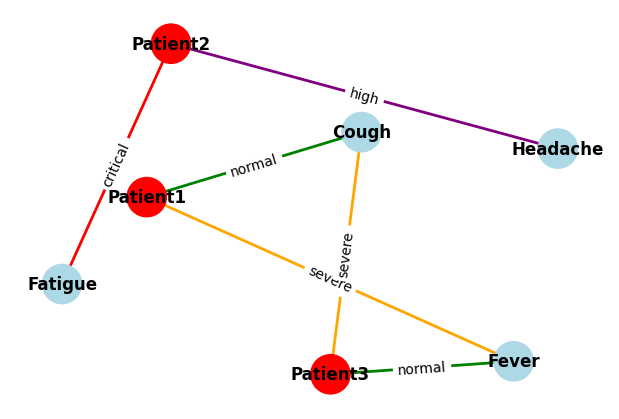

In [ ]:
# Create a graph
G = nx.Graph()

# Add patient nodes (red)
patients = ["Patient1", "Patient2", "Patient3"]
G.add_nodes_from(patients, node_color='red')

# Add symptom nodes (blue)
symptoms = ["Fever", "Cough", "Fatigue", "Headache"]
G.add_nodes_from(symptoms, node_color='lightblue')

# Add edges with features (normal, severe, critical, high)
edges = [
    ("Patient1", "Fever", {"feature": "severe"}),
    ("Patient1", "Cough", {"feature": "normal"}),
    ("Patient2", "Fatigue", {"feature": "critical"}),
    ("Patient2", "Headache", {"feature": "high"}),
    ("Patient3", "Fever", {"feature": "normal"}),
    ("Patient3", "Cough", {"feature": "severe"}),
]
G.add_edges_from(edges)

# Define node colors based on type
node_colors = [G.nodes[node]['node_color'] for node in G.nodes]

# Define edge labels and colors based on features
edge_labels = {(u, v): d["feature"] for u, v, d in edges}
edge_colors = ["green" if d["feature"] == "normal" else
               "orange" if d["feature"] == "severe" else
               "red" if d["feature"] == "critical" else
               "purple" for _, _, d in edges]

# Increase distance between nodes using the `k` parameter in spring_layout
pos = nx.spring_layout(G, k=2)  # Increase `k` for more spacing

# Reduce image size using figsize
plt.figure(figsize=(6, 4))  # Smaller image size (width, height)

# Draw the graph
nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color=edge_colors, width=2, font_weight='bold', node_size=800)

# Draw edge labels
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black')

# Save and display the graph
plt.savefig("patient_symptom_network.png", format="PNG", dpi=300, bbox_inches='tight')  # Save with tight bounding box
plt.show()

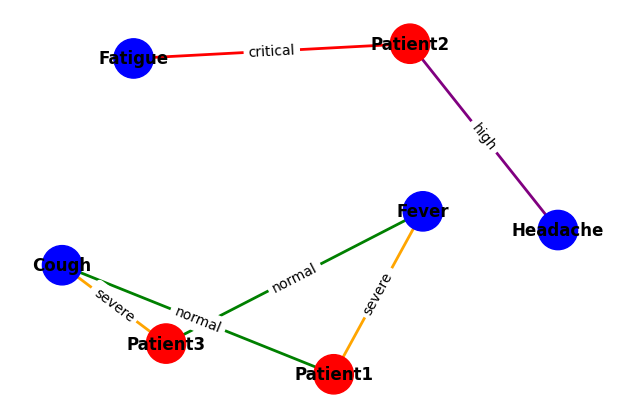

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add patient nodes (red)
patients = ["Patient1", "Patient2", "Patient3"]
G.add_nodes_from(patients, node_color='red')

# Add symptom nodes (blue)
symptoms = ["Fever", "Cough", "Fatigue", "Headache"]
G.add_nodes_from(symptoms, node_color='lightblue')

# Add edges with features (normal, severe, critical, high)
edges = [
    ("Patient1", "Fever", {"feature": "severe"}),
    ("Patient1", "Cough", {"feature": "normal"}),
    ("Patient2", "Fatigue", {"feature": "critical"}),
    ("Patient2", "Headache", {"feature": "high"}),
    ("Patient3", "Fever", {"feature": "normal"}),
    ("Patient3", "Cough", {"feature": "severe"}),
]
G.add_edges_from(edges)

# Define node colors based on type
node_colors = [G.nodes[node]['node_color'] for node in G.nodes]

# Define edge labels and colors based on features
edge_labels = {(u, v): d["feature"] for u, v, d in edges}
edge_colors = ["green" if d["feature"] == "normal" else
               "orange" if d["feature"] == "severe" else
               "red" if d["feature"] == "critical" else
               "purple" for _, _, d in edges]

# Increase distance between nodes using the `k` parameter in spring_layout
pos = nx.spring_layout(G, k=2)  # Increase `k` for more spacing

# Reduce image size using figsize
plt.figure(figsize=(6, 4))  # Smaller image size (width, height)

# Draw the graph
nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color=edge_colors, width=2, font_weight='bold', node_size=800)

# Draw edge labels
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black')

# Save and display the graph
plt.savefig("patient_symptom_network.png", format="PNG", dpi=300, bbox_inches='tight')  # Save with tight bounding box
plt.show()

## Type 2

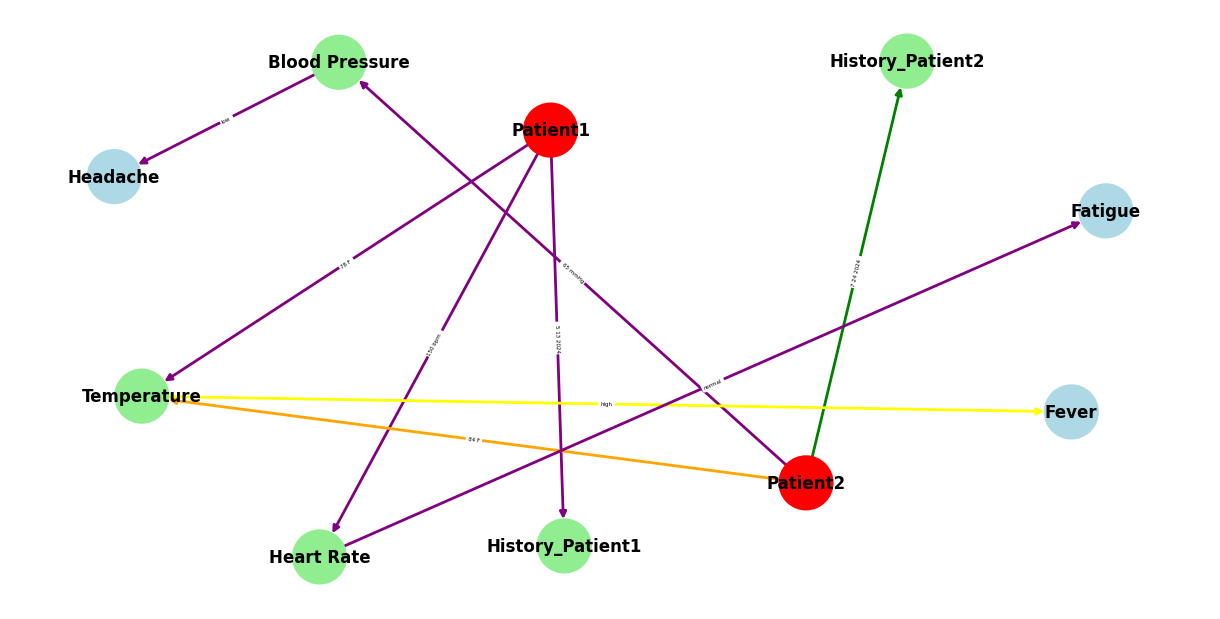

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.DiGraph()

# Add patient nodes (red)
patients = ["Patient1", "Patient2"] # , "Patient3"
G.add_nodes_from(patients, node_color='red')

# Add observation nodes (lightgreen)
observations = ["Temperature", "Heart Rate", "Blood Pressure"] # , "Respiratory Rate", "Oxygen Saturation"
G.add_nodes_from(observations, node_color='lightgreen')

# Add symptom nodes (lightblue)
symptoms = ["Fever", "Fatigue", "Headache"] # , "Shortness of Breath"
G.add_nodes_from(symptoms, node_color='lightblue')

history = ["History_Patient1", "History_Patient2"] # , "History_Patient3"
G.add_nodes_from(history, node_color='lightgreen')

# Add edges between patients and observations
patient_observation_edges = [
    ("Patient1", "Temperature", {"feature": "78 F"}),
    ("Patient1", "Heart Rate", {"feature": "150 bpm"}),
    ("Patient2", "Blood Pressure", {"feature": "65 mmHg"}),
    ("Patient2", "Temperature", {"feature": "84 F"}),

    # ("Patient2", "Respiratory Rate", {"feature": "10 bpm"}),
    # ("Patient3", "Oxygen Saturation", {"feature": "80 %"}),
]
G.add_edges_from(patient_observation_edges)

# Add edges between observations and symptoms
observation_symptom_edges = [
    ("Temperature", "Fever", {"feature": "high"}),
    ("Heart Rate", "Fatigue", {"feature": "normal"}),
    ("Blood Pressure", "Headache", {"feature": "low"}),
    # ("Respiratory Rate", "Shortness of Breath", {"feature": "critical"}),
    # ("Oxygen Saturation", "Fatigue", {"feature": "severe"}),
]
G.add_edges_from(observation_symptom_edges)

# Add edges between patients and observations
patient_history_edges = [
    ("Patient1", "History_Patient1", {"feature": "5 13 2024"}),
    ("Patient2", "History_Patient2", {"feature": "7 24 2024"}),
    # ("Patient3", "History_Patient3", {"feature": "12 30 2023"}),
]
G.add_edges_from(patient_history_edges)

# Define node colors based on type
node_colors = [G.nodes[node]['node_color'] for node in G.nodes]

# Define edge labels and colors based on features
edge_labels = {(u, v): d["feature"] for u, v, d in patient_observation_edges + observation_symptom_edges + patient_history_edges}
edge_colors = [
    "green" if d["feature"] == "normal" else
    "orange" if d["feature"] == "high" else
    "yellow" if d["feature"] == "low" else
    "red" if d["feature"] == "critical" else
    "purple" for _, _, d in patient_observation_edges + observation_symptom_edges + patient_history_edges
]


# Increase distance between nodes using the `k` parameter in spring_layout
pos = nx.spring_layout(G, k=3)  # Increase `k` for more spacing

# Reduce image size using figsize
plt.figure(figsize=(12, 6))  # Adjust image size (width, height)

# Draw the graph
nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color=edge_colors, width=2, font_weight='bold', node_size=1500, arrows=True)

# Draw edge labels
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black', font_size=4)

# Save and display the graph
plt.savefig("directed_patient_observation_symptom_network.png", format="PNG", dpi=400, bbox_inches='tight')  # Save with tight bounding box
plt.show()

## Get Patient history in temporal KG fashion

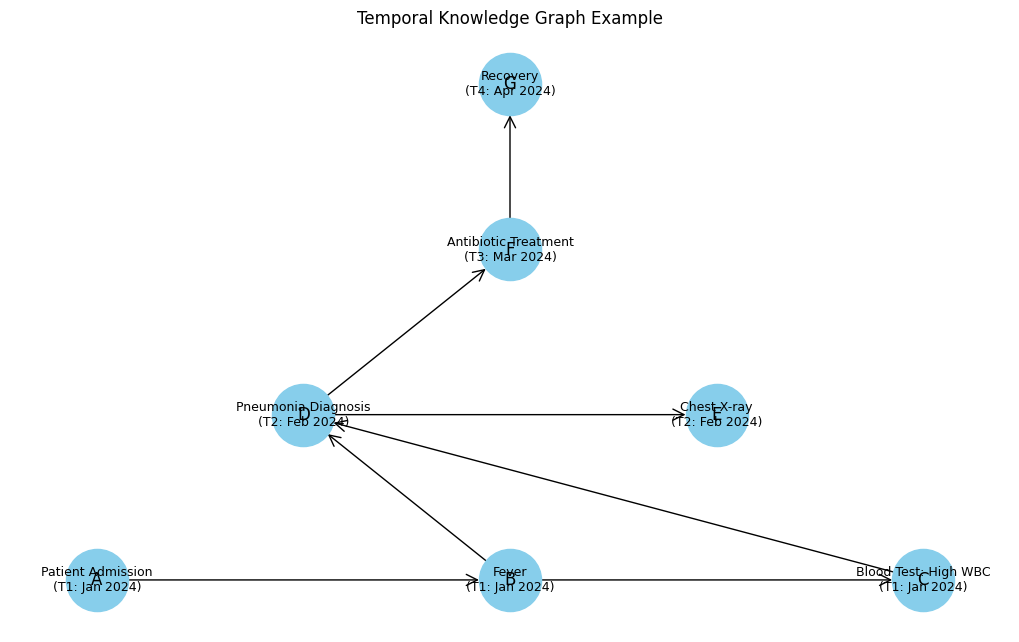

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Define events with an identifier, label, and time stamp.
# In a real scenario, these events could be more detailed and automatically generated.
events = [
    ('A', 'Patient Admission', 'T1: Jan 2024'),
    ('B', 'Fever', 'T1: Jan 2024'),
    ('C', 'Blood Test: High WBC', 'T1: Jan 2024'),
    ('D', 'Pneumonia Diagnosis', 'T2: Feb 2024'),
    ('E', 'Chest X-ray', 'T2: Feb 2024'),
    ('F', 'Antibiotic Treatment', 'T3: Mar 2024'),
    ('G', 'Recovery', 'T4: Apr 2024')
]

# Add nodes with time and label as attributes
for node, label, time in events:
    G.add_node(node, label=label, time=time)

# Define edges that show the progression of events over time
edges = [
    ('A', 'B'),
    ('B', 'C'),
    ('B', 'D'),
    ('C', 'D'),
    ('D', 'E'),
    ('D', 'F'),
    ('F', 'G')
]
G.add_edges_from(edges)

# Create a mapping of time stamps to y-axis coordinates.
time_mapping = {
    'T1: Jan 2024': 1,
    'T2: Feb 2024': 2,
    'T3: Mar 2024': 3,
    'T4: Apr 2024': 4
}

# Group nodes by their time stamp to help assign x-axis positions.
time_groups = {}
for node, data in G.nodes(data=True):
    time_val = data['time']
    time_groups.setdefault(time_val, []).append(node)

# Create positions for each node.
# Nodes with the same time stamp are spread horizontally.
positions = {}
for time_val, nodes_in_time in time_groups.items():
    n = len(nodes_in_time)
    # Spread nodes horizontally (using sorted order for consistency)
    for i, node in enumerate(sorted(nodes_in_time)):
        # Calculate x-coordinate (spread evenly around x=0)
        x = i - (n - 1) / 2.0
        y = time_mapping[time_val]
        positions[node] = (x, y)

# Draw the graph with the computed positions.
plt.figure(figsize=(10, 6))
nx.draw(G,
        pos=positions,
        with_labels=True,
        node_size=2000,
        node_color='skyblue',
        arrows=True,
        arrowstyle='->',
        arrowsize=20)

# Customize the labels to include both event description and timestamp.
node_labels = {node: f"{data['label']}\n({data['time']})" for node, data in G.nodes(data=True)}
nx.draw_networkx_labels(G, pos=positions, labels=node_labels, font_size=9)

plt.title("Temporal Knowledge Graph Example")
plt.axis('off')
plt.show()


## Every time patient goes for checkup, we add new nodes( new time for same symptom) if so Patient Admission will be added to Patient A node.

Each patient will have his seperate KG

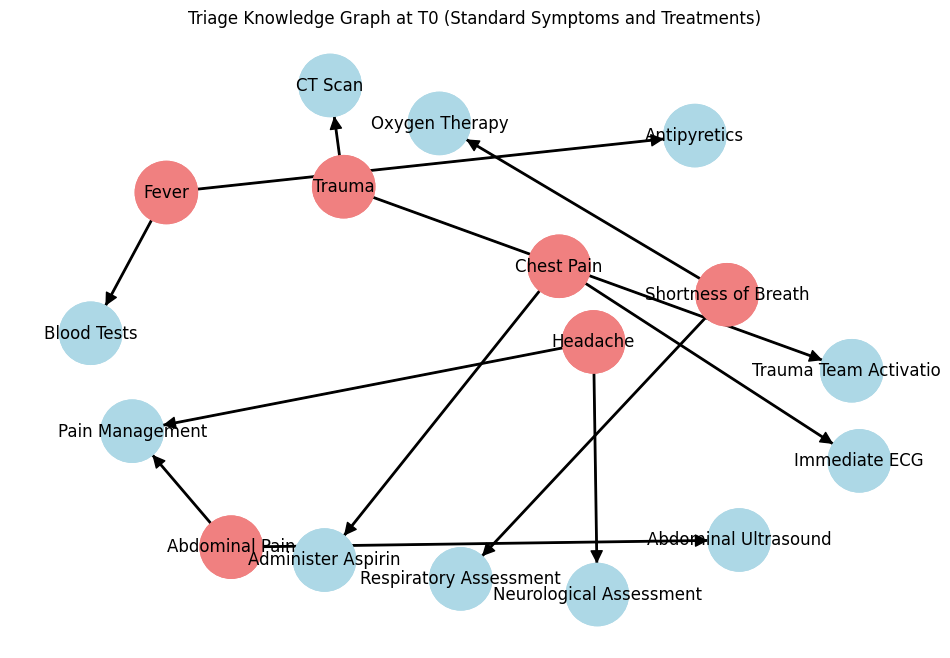

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph for the triage system at T0 (no patients yet)
G = nx.DiGraph()

# Define standard symptoms and their corresponding treatments (example mappings).
symptoms = {
    "Chest Pain": ["Immediate ECG", "Administer Aspirin"],
    "Shortness of Breath": ["Oxygen Therapy", "Respiratory Assessment"],
    "Abdominal Pain": ["Abdominal Ultrasound", "Pain Management"],
    "Fever": ["Antipyretics", "Blood Tests"],
    "Headache": ["Pain Management", "Neurological Assessment"],
    "Trauma": ["Trauma Team Activation", "CT Scan"]
}
# Add symptom nodes (tagged as such)
for symptom in symptoms.keys():
    G.add_node(symptom, type="symptom")

temp = [(i,x) for i in symptoms for x in symptoms[i]]

# Add treatment nodes and edges from symptom to treatment.
for symptom, treatments in symptoms.items():
    for treatment in treatments:
        if treatment not in G:
            G.add_node(treatment, type="treatment")
        # Add an edge from the symptom to the treatment (arrow indicates direction)
G.add_edges_from(temp)

# Use spring_layout with a higher 'k' parameter to spread the nodes out more.
pos = nx.spring_layout(G, seed=42, k=1.5)

# Create a color map based on node type: symptoms in lightcoral and treatments in lightblue.
node_colors = []
for node, data in G.nodes(data=True):
    if data['type'] == "symptom":
        node_colors.append("lightcoral")
    else:
        node_colors.append("lightblue")

plt.figure(figsize=(12, 8))
# Draw nodes with colors
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=2000)
# Draw edges with arrows enabled
nx.draw_networkx_edges(
    G, pos,
    arrowstyle='-|>',
    arrowsize=20,
    edge_color='black',
    width=2
)
# Draw labels
# nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

nx.draw(G, pos, with_labels=True, node_color=node_colors,
        node_size=2000, arrowstyle='-|>', arrowsize=20)

plt.title("Triage Knowledge Graph at T0 (Standard Symptoms and Treatments)")
plt.axis('off')
plt.show()


## On site, robot will connect Patients with the above observed sympyoms. Add temporal and diagnosis info in features. This will be of directed format. We can then use RAG to collect each patient's current status, his past medical history,need to check if Graph Convolution will be required. Pass this info to VLM

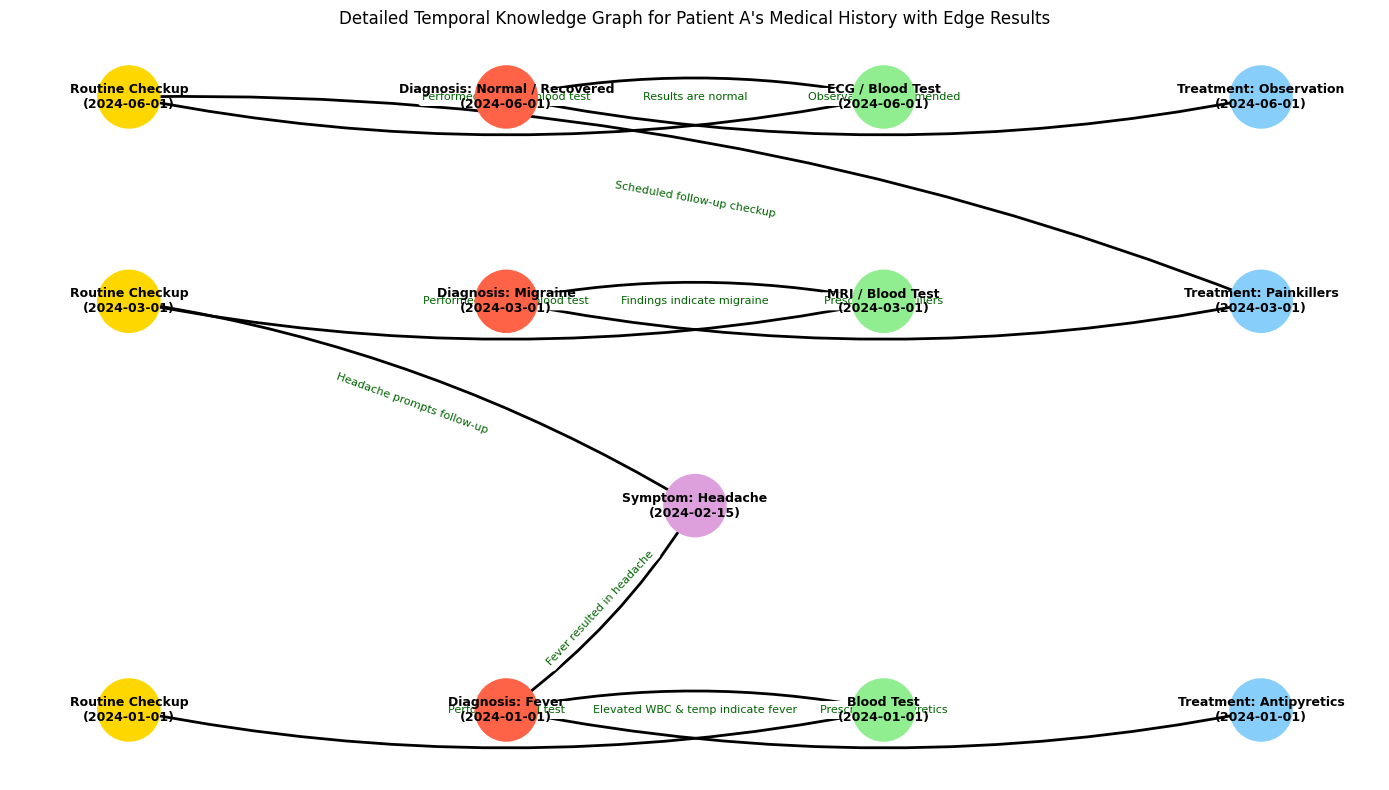

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph for Patient A's temporal medical history
KG = nx.DiGraph()

# --------------------------------------------------
# Define nodes for three checkups with dates and details
# --------------------------------------------------

# Checkup 1 (2024-01-01)
KG.add_node("Checkup_1", label="Routine Checkup", date="2024-01-01", type="checkup")
KG.add_node("Test_1", label="Blood Test", date="2024-01-01", type="test")
KG.add_node("Diagnosis_1", label="Diagnosis: Fever", date="2024-01-01", type="diagnosis")
KG.add_node("Treatment_1", label="Treatment: Antipyretics", date="2024-01-01", type="treatment")

# An intermediate symptom node that shows a complication from the first checkup
KG.add_node("Symptom_Headache", label="Symptom: Headache", date="2024-02-15", type="symptom")

# Checkup 2 (2024-03-01)
KG.add_node("Checkup_2", label="Routine Checkup", date="2024-03-01", type="checkup")
KG.add_node("Test_2", label="MRI / Blood Test", date="2024-03-01", type="test")
KG.add_node("Diagnosis_2", label="Diagnosis: Migraine", date="2024-03-01", type="diagnosis")
KG.add_node("Treatment_2", label="Treatment: Painkillers", date="2024-03-01", type="treatment")

# Checkup 3 (2024-06-01)
KG.add_node("Checkup_3", label="Routine Checkup", date="2024-06-01", type="checkup")
KG.add_node("Test_3", label="ECG / Blood Test", date="2024-06-01", type="test")
KG.add_node("Diagnosis_3", label="Diagnosis: Normal / Recovered", date="2024-06-01", type="diagnosis")
KG.add_node("Treatment_3", label="Treatment: Observation", date="2024-06-01", type="treatment")

# --------------------------------------------------
# Define directed edges along with edge features (results, observations, rationale)
# --------------------------------------------------

# Checkup 1 flow
KG.add_edge("Checkup_1", "Test_1", result="Performed blood test")
KG.add_edge("Test_1", "Diagnosis_1", result="Elevated WBC & temp indicate fever")
KG.add_edge("Diagnosis_1", "Treatment_1", result="Prescribed antipyretics")

# Fever diagnosis leads to headache as an observation
KG.add_edge("Diagnosis_1", "Symptom_Headache", result="Fever resulted in headache")

# The headache symptom triggers a second checkup
KG.add_edge("Symptom_Headache", "Checkup_2", result="Headache prompts follow-up")

# Checkup 2 flow
KG.add_edge("Checkup_2", "Test_2", result="Performed MRI and blood test")
KG.add_edge("Test_2", "Diagnosis_2", result="Findings indicate migraine")
KG.add_edge("Diagnosis_2", "Treatment_2", result="Prescribed painkillers")

# Follow-up from treatment 2 leads to another checkup
KG.add_edge("Treatment_2", "Checkup_3", result="Scheduled follow-up checkup")

# Checkup 3 flow
KG.add_edge("Checkup_3", "Test_3", result="Performed ECG and blood test")
KG.add_edge("Test_3", "Diagnosis_3", result="Results are normal")
KG.add_edge("Diagnosis_3", "Treatment_3", result="Observation recommended")

# --------------------------------------------------
# Positioning nodes based on date and grouping within the same date
# --------------------------------------------------

# Map dates to y-coordinates (earlier events lower; later events higher)
date_to_y = {
    "2024-01-01": 1,
    "2024-02-15": 2,
    "2024-03-01": 3,
    "2024-06-01": 4
}

# Group nodes by their date to help assign horizontal (x) positions.
date_groups = {}
for node, data in KG.nodes(data=True):
    d = data["date"]
    date_groups.setdefault(d, []).append(node)

# Assign positions: each group gets the same y, and nodes are spread horizontally.
pos = {}
for d, nodes in date_groups.items():
    n = len(nodes)
    for i, node in enumerate(sorted(nodes)):
        # x coordinate spread evenly; if one node then x=0, otherwise center them
        x = i - (n - 1) / 2.0
        y = date_to_y[d]
        pos[node] = (x, y)

# --------------------------------------------------
# Coloring nodes by type for clarity
# --------------------------------------------------

color_map = []
for node, data in KG.nodes(data=True):
    t = data["type"]
    if t == "checkup":
        color_map.append("gold")
    elif t == "test":
        color_map.append("lightgreen")
    elif t == "diagnosis":
        color_map.append("tomato")
    elif t == "treatment":
        color_map.append("lightskyblue")
    elif t == "symptom":
        color_map.append("plum")
    else:
        color_map.append("grey")

# --------------------------------------------------
# Draw the graph with nodes, edges, and edge labels for the results
# --------------------------------------------------

plt.figure(figsize=(14, 8))
nx.draw_networkx_nodes(KG, pos, node_color=color_map, node_size=2000)
nx.draw_networkx_edges(
    KG, pos,
    arrowstyle='-|>',
    arrowsize=20,
    width=2,
    edge_color='black',
    connectionstyle='arc3,rad=0.1'
)

# Create labels for nodes: combine event label and date
node_labels = {node: f"{data['label']}\n({data['date']})" for node, data in KG.nodes(data=True)}
nx.draw_networkx_labels(KG, pos, node_labels, font_size=9, font_weight='bold')

# Create edge labels from the 'result' attribute
edge_labels = {(u, v): d.get("result", "") for u, v, d in KG.edges(data=True)}
nx.draw_networkx_edge_labels(KG, pos, edge_labels=edge_labels, font_color='darkgreen', font_size=8)

plt.title("Detailed Temporal Knowledge Graph for Patient A's Medical History with Edge Results")
plt.axis('off')
plt.tight_layout()
plt.show()


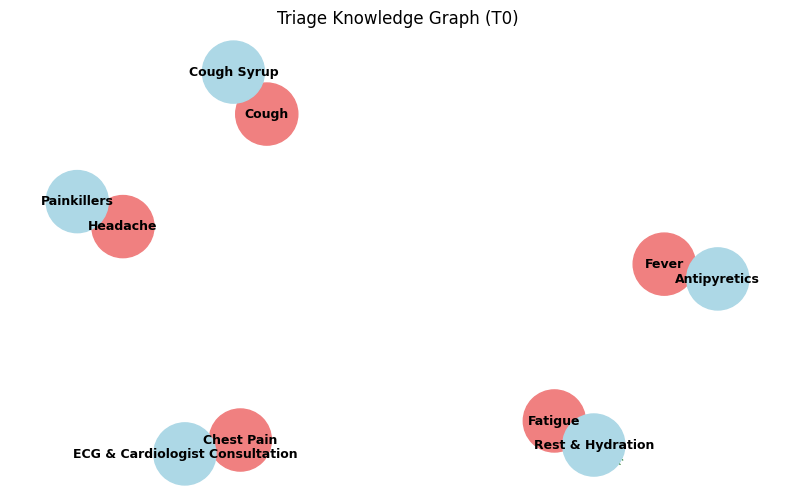

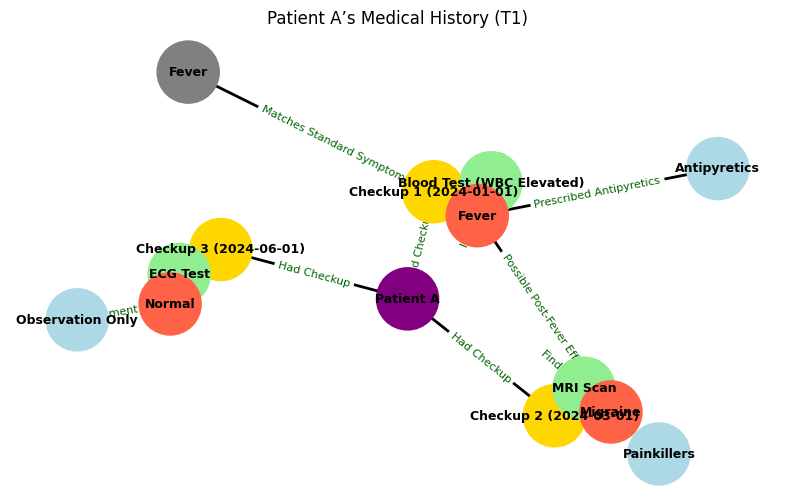

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# --------------------------------------------------
# Graph 1: Triage Knowledge Graph (T0) - General Medical Knowledge
# --------------------------------------------------

Triage_KG = nx.DiGraph()

symptoms = {
    "Fever": "Antipyretics",
    "Headache": "Painkillers",
    "Cough": "Cough Syrup",
    "Chest Pain": "ECG & Cardiologist Consultation",
    "Fatigue": "Rest & Hydration",
}

for symptom, treatment in symptoms.items():
    Triage_KG.add_node(symptom, label=symptom, type="symptom")
    Triage_KG.add_node(treatment, label=treatment, type="treatment")
    Triage_KG.add_edge(symptom, treatment, relation="Standard Treatment")

# --------------------------------------------------
# Graph 2: Patient A's Medical History (T1)
# --------------------------------------------------

Patient_A_KG = nx.DiGraph()

# Add Patient Node
Patient_A_KG.add_node("Patient_A", label="Patient A", type="patient")

# Checkup 1 (2024-01-01)
Patient_A_KG.add_node("Checkup_1", label="Checkup 1 (2024-01-01)", type="checkup")
Patient_A_KG.add_edge("Patient_A", "Checkup_1", relation="Had Checkup")

Patient_A_KG.add_node("Test_1", label="Blood Test (WBC Elevated)", type="test")
Patient_A_KG.add_node("Diagnosis_1", label="Fever", type="diagnosis")
Patient_A_KG.add_node("Treatment_1", label="Antipyretics", type="treatment")

Patient_A_KG.add_edge("Checkup_1", "Test_1", result="WBC Elevated")
Patient_A_KG.add_edge("Test_1", "Diagnosis_1", result="Indicates Infection")
Patient_A_KG.add_edge("Diagnosis_1", "Treatment_1", result="Prescribed Antipyretics")

# Link Fever to General Triage KG
Patient_A_KG.add_edge("Diagnosis_1", "Fever", relation="Matches Standard Symptom")

# Checkup 2 (2024-03-01)
Patient_A_KG.add_node("Checkup_2", label="Checkup 2 (2024-03-01)", type="checkup")
Patient_A_KG.add_edge("Patient_A", "Checkup_2", relation="Had Checkup")

Patient_A_KG.add_node("Test_2", label="MRI Scan", type="test")
Patient_A_KG.add_node("Diagnosis_2", label="Migraine", type="diagnosis")
Patient_A_KG.add_node("Treatment_2", label="Painkillers", type="treatment")

Patient_A_KG.add_edge("Checkup_2", "Test_2", result="Performed MRI")
Patient_A_KG.add_edge("Test_2", "Diagnosis_2", result="Findings Indicate Migraine")
Patient_A_KG.add_edge("Diagnosis_2", "Treatment_2", result="Prescribed Painkillers")

# Link Migraine to previous Fever
Patient_A_KG.add_edge("Diagnosis_1", "Diagnosis_2", relation="Possible Post-Fever Effect")

# Checkup 3 (2024-06-01)
Patient_A_KG.add_node("Checkup_3", label="Checkup 3 (2024-06-01)", type="checkup")
Patient_A_KG.add_edge("Patient_A", "Checkup_3", relation="Had Checkup")

Patient_A_KG.add_node("Test_3", label="ECG Test", type="test")
Patient_A_KG.add_node("Diagnosis_3", label="Normal", type="diagnosis")
Patient_A_KG.add_node("Treatment_3", label="Observation Only", type="treatment")

Patient_A_KG.add_edge("Checkup_3", "Test_3", result="Performed ECG")
Patient_A_KG.add_edge("Test_3", "Diagnosis_3", result="Results Normal")
Patient_A_KG.add_edge("Diagnosis_3", "Treatment_3", result="No Treatment Needed")

# Ensure all nodes have "type" attribute
for node in Patient_A_KG.nodes():
    if "type" not in Patient_A_KG.nodes[node]:
        Patient_A_KG.nodes[node]["type"] = "unknown"

# --------------------------------------------------
# Visualization Function
# --------------------------------------------------

def visualize_kg(graph, title):
    plt.figure(figsize=(10, 6))

    pos = nx.spring_layout(graph, seed=42)

    # Define colors
    node_colors = {
        "symptom": "lightcoral",
        "treatment": "lightblue",
        "checkup": "gold",
        "test": "lightgreen",
        "diagnosis": "tomato",
        "patient": "purple",
        "unknown": "grey",
    }

    # Assign colors based on node type
    colors = [node_colors.get(data["type"], "grey") for _, data in graph.nodes(data=True)]

    nx.draw_networkx_nodes(graph, pos, node_color=colors, node_size=2000)
    nx.draw_networkx_edges(graph, pos, arrowstyle='-|>', arrowsize=15, width=2, edge_color='black')

    # Labels
    nx.draw_networkx_labels(graph, pos, {n: d.get("label", str(n)) for n, d in graph.nodes(data=True)}, font_size=9, font_weight='bold')

    # Edge Labels
    edge_labels = {(u, v): d.get("result", d.get("relation", "")) for u, v, d in graph.edges(data=True)}
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_color='darkgreen', font_size=8)

    plt.title(title)
    plt.axis('off')
    plt.show()

# Show Graphs
visualize_kg(Triage_KG, "Triage Knowledge Graph (T0)")
visualize_kg(Patient_A_KG, "Patient A’s Medical History (T1)")


In [ ]:
!pip install torch torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 86.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 71.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 64.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 51.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
 

In [ ]:
import torch
from torch_geometric.data import Data

# Define node and edge types
node_types = {
    "Patient": 0,
    "Observation": 1,
    "Location": 2,
    "HeartRate": 3,
    "RespiratoryRate": 4,
    "Temperature": 5,
    "SevereHemorrhage": 6,
    "RespiratoryDistress": 7,
    "Trauma": 8,
}

edge_types = {
    "HAS_OBSERVATION": 0,
    "RECORDED_AT": 1,
    "HAS_VITAL": 2,
    "HAS_Critical": 3,
    "HAS_TRAUMA": 4,
    "NEXT_OBSERVATION": 5,
}

# Containers
node_features, node_labels, edges, edge_attrs = [], [], [], []
node_index_map = {}

def add_node(node_id, node_type, features=[]):
    if node_id not in node_index_map:
        index = len(node_features)
        node_index_map[node_id] = index
        feature_tensor = torch.tensor(features, dtype=torch.float32) if features else torch.zeros(1)
        node_features.append(feature_tensor)
        node_labels.append(node_types[node_type])

def add_edge(src_id, dst_id, relation):
    edges.append([node_index_map[src_id], node_index_map[dst_id]])
    edge_attrs.append(edge_types[relation])

# Add patient
add_node("P001", "Patient")

# Observation data (you can expand this list)
observations = [
    {
        "id": "OBS001",
        "timestamp": "2025-04-08T10:15:00",
        "hr": 105, "rr": 30, "temp": 101.2,
        "trauma_status": ["Wound", "Normal", "Wound", "Amputation"]
    },
    {
        "id": "OBS002",
        "timestamp": "2025-04-08T11:00:00",
        "hr": 98, "rr": 20, "temp": 85,
        "trauma_status": ["Wound", "Normal", "Wound", "Amputation"]
    },
    {
        "id": "OBS003",
        "timestamp": "2025-04-08T11:20:00",
        "hr": 20, "rr": 5, "temp": 30,
        "trauma_status": ["Not Testable"] * 4
    }
]

prev_obs_id = None
for obs in observations:
    oid = obs["id"]
    obs_id = f"P001-{oid}"
    add_node(obs_id, "Observation")
    add_edge("P001", obs_id, "HAS_OBSERVATION")

    # Location
    loc_id = f"{obs_id}-loc"
    add_node(loc_id, "Location")
    add_edge(obs_id, loc_id, "RECORDED_AT")

    # Vitals
    add_node(f"{obs_id}-hr", "HeartRate", [obs["hr"]])
    add_node(f"{obs_id}-rr", "RespiratoryRate", [obs["rr"]])
    add_node(f"{obs_id}-temp", "Temperature", [obs["temp"]])
    add_edge(obs_id, f"{obs_id}-hr", "HAS_VITAL")
    add_edge(obs_id, f"{obs_id}-rr", "HAS_VITAL")
    add_edge(obs_id, f"{obs_id}-temp", "HAS_VITAL")

    # Criticals
    add_node(f"{obs_id}-hem", "SevereHemorrhage")
    add_node(f"{obs_id}-rd", "RespiratoryDistress")
    add_edge(obs_id, f"{obs_id}-hem", "HAS_Critical")
    add_edge(obs_id, f"{obs_id}-rd", "HAS_Critical")

    # Trauma
    body_parts = ["Head", "Torso", "Upper", "Lower"]
    for i, status in enumerate(obs["trauma_status"]):
        trauma_id = f"{obs_id}-trauma-{body_parts[i]}"
        add_node(trauma_id, "Trauma")
        add_edge(obs_id, trauma_id, "HAS_TRAUMA")

    # Temporal chaining
    if prev_obs_id:
        add_edge(prev_obs_id, obs_id, "NEXT_OBSERVATION")
    prev_obs_id = obs_id

# Convert to PyTorch Geometric format
edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()
edge_attr = torch.tensor(edge_attrs, dtype=torch.long)
x = torch.stack(node_features)
y = torch.tensor(node_labels)

graph = Data(x=x, edge_index=edge_index, edge_attr=edge_attr, y=y)
print(graph)


Data(x=[34, 1], edge_index=[2, 35], edge_attr=[35], y=[34])


In [ ]:
print(graph)


Data(x=[34, 1], edge_index=[2, 35], edge_attr=[35], y=[34])


In [ ]:
!pip install networkx matplotlib


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_graph(graph, node_index_map, edge_types, node_labels):
    G = nx.DiGraph()
    reverse_node_map = {v: k for k, v in node_index_map.items()}
    reverse_node_types = {v: k for k, v in node_types.items()}
    reverse_edge_types = {v: k for k, v in edge_types.items()}

    for idx, label in enumerate(node_labels):
        G.add_node(idx, label=f"{reverse_node_types[label]}\n{reverse_node_map[idx]}")

    for i in range(graph.edge_index.size(1)):
        src = graph.edge_index[0, i].item()
        dst = graph.edge_index[1, i].item()
        etype = graph.edge_attr[i].item()
        G.add_edge(src, dst, label=reverse_edge_types[etype])

    pos = nx.spring_layout(G, seed=42)
    edge_labels = nx.get_edge_attributes(G, 'label')
    node_labels = nx.get_node_attributes(G, 'label')

    plt.figure(figsize=(15, 10))
    nx.draw(G, pos, labels=node_labels, with_labels=True, node_size=2000, node_color='lightblue', font_size=8)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)
    plt.title("Temporal Knowledge Graph - PyTorch Geometric View")
    plt.show()


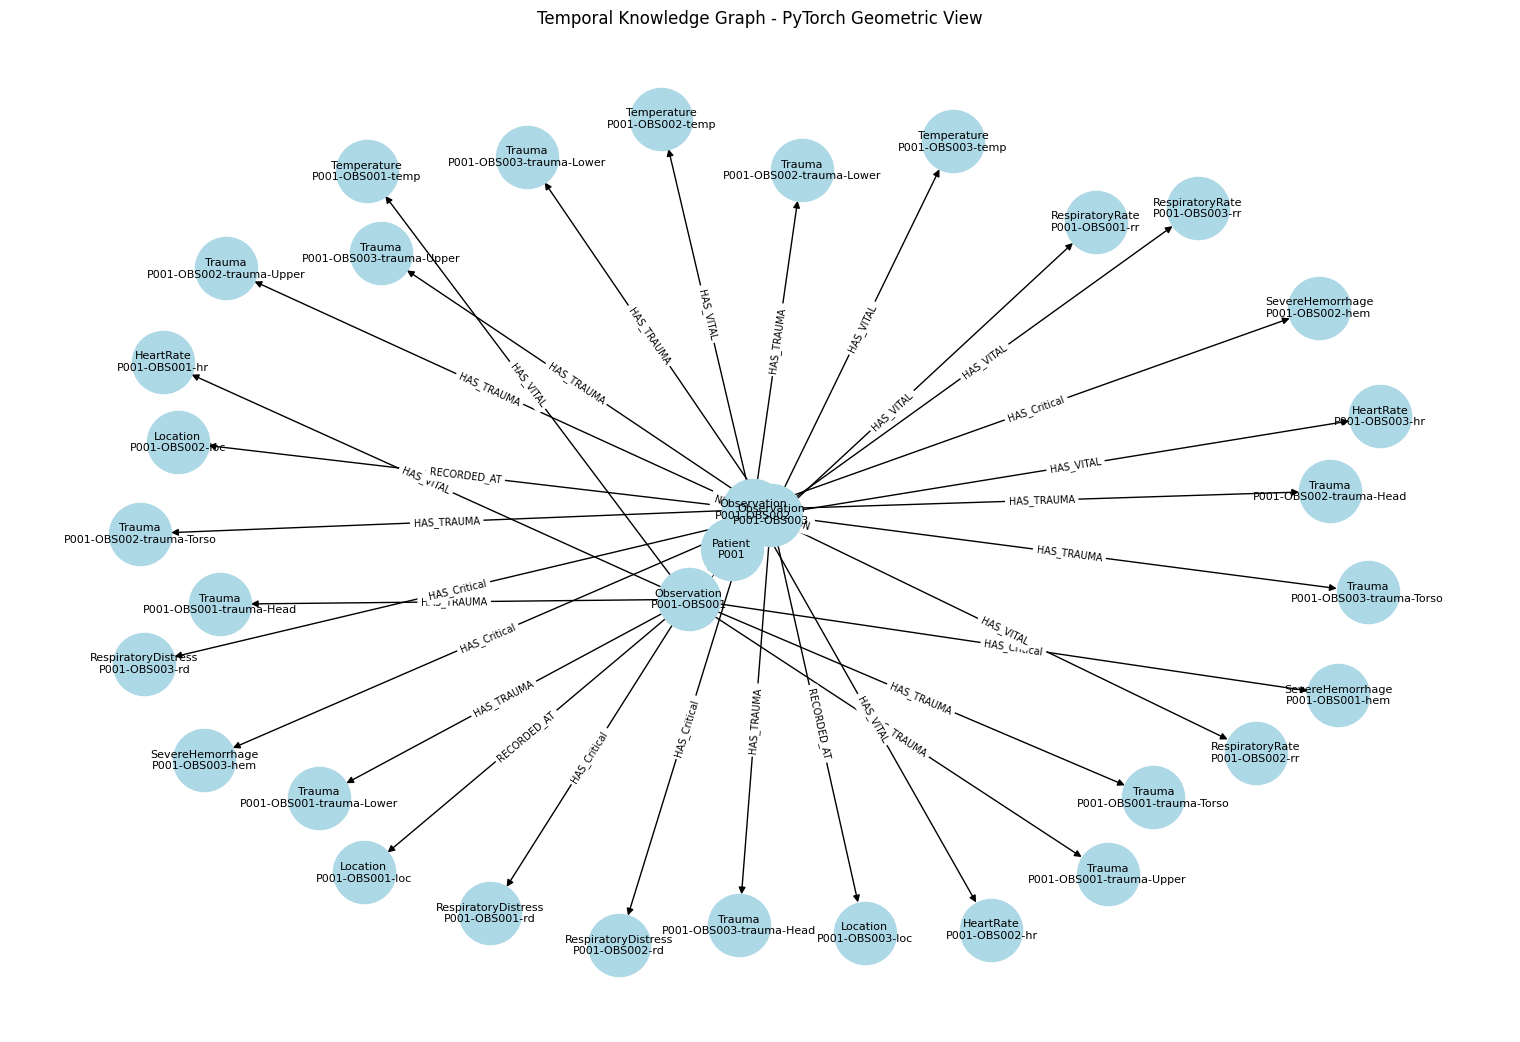

In [ ]:
visualize_graph(graph, node_index_map, edge_types, node_labels)
